# Tissue
Some patches have just a few isolated cells.
We suspect that these cells have lost their tissue structure and will not be good predictors of disease.
We used CellProfiler to measure the portion of each patch covered by tissue.
The goal was to exclude patches that were devoid of cells (indicated by white background).

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
DIRECTORY = '/home/jrm/Adjeroh/Naved/Process100.all/'
FILE = 'Process100_Tissue.csv'

In [3]:
object_df = pd.read_csv(DIRECTORY+FILE)
object_df.describe()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Location_CenterMassIntensity_X_Eosin,Location_CenterMassIntensity_Y_Eosin,Location_CenterMassIntensity_Z_Eosin,Location_Center_X,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_Eosin,Location_MaxIntensity_Y_Eosin,Location_MaxIntensity_Z_Eosin,Number_Object_Number
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,...,1242.000000,1242.000000,1242.0,1242.000000,1242.000000,1242.0,1242.000000,1242.000000,1242.0,1242.000000
mean,314.289855,1.966184,36897.130435,46360.068438,241.756844,236.900161,50.575684,43.638486,146.178623,140.098271,...,146.225167,140.105106,0.0,146.178623,140.098271,0.0,145.497585,138.205314,0.0,1.966184
std,172.427190,1.447045,32263.721424,35238.196783,87.633037,90.815650,79.389986,74.711762,71.467942,70.618502,...,72.198775,71.381334,0.0,71.467942,70.618502,0.0,95.398188,93.981339,0.0,1.447045
min,1.000000,1.000000,3.000000,9.000000,5.000000,5.000000,0.000000,0.000000,1.250000,1.741935,...,1.259324,1.972885,0.0,1.250000,1.741935,0.0,0.000000,0.000000,0.0,1.000000
25%,161.250000,1.000000,5534.750000,9293.250000,192.000000,178.000000,0.000000,0.000000,92.764036,87.281186,...,92.397389,85.038876,0.0,92.764036,87.281186,0.0,57.250000,49.000000,0.0,1.000000
50%,326.000000,2.000000,29591.000000,45600.000000,300.000000,300.000000,0.000000,0.000000,149.500000,149.500000,...,149.652493,149.053474,0.0,149.500000,149.500000,0.0,144.000000,133.500000,0.0,2.000000
75%,470.000000,2.000000,65242.750000,90000.000000,300.000000,300.000000,92.750000,71.000000,196.314022,181.208358,...,196.941304,182.473639,0.0,196.314022,181.208358,0.0,235.000000,227.000000,0.0,2.000000
max,600.000000,11.000000,90000.000000,90000.000000,300.000000,300.000000,276.000000,273.000000,289.748092,286.915663,...,289.572163,286.786244,0.0,289.748092,286.915663,0.0,299.000000,299.000000,0.0,11.000000


In [4]:
patch_max=object_df.groupby(['ImageNumber']).max()
patch_max.describe()
# We have a tissue measurement for 599 files (expected 600).

,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_CentralMoment_0_0,...,Location_CenterMassIntensity_X_Eosin,Location_CenterMassIntensity_Y_Eosin,Location_CenterMassIntensity_Z_Eosin,Location_Center_X,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_Eosin,Location_MaxIntensity_Y_Eosin,Location_MaxIntensity_Z_Eosin,Number_Object_Number
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,...,599.000000,599.000000,599.0,599.000000,599.000000,599.0,599.000000,599.000000,599.0,599.000000
mean,2.073456,63005.482471,75294.689482,294.467446,291.808013,72.362270,62.300501,190.050134,182.829500,63005.482471,...,190.677286,183.490203,0.0,190.050134,182.829500,0.0,196.921536,189.068447,0.0,2.073456
std,1.335625,25757.656341,23358.005621,29.591113,35.919990,90.173619,85.327658,50.291280,49.536084,25757.656341,...,50.917748,50.120219,0.0,50.291280,49.536084,0.0,85.306935,84.575966,0.0,1.335625
min,1.000000,360.000000,456.000000,26.000000,28.000000,0.000000,0.000000,11.673008,11.946309,360.000000,...,9.612930,12.388936,0.0,11.673008,11.946309,0.0,0.000000,1.000000,0.0,1.000000
25%,1.000000,46913.500000,67050.000000,300.000000,300.000000,0.000000,0.000000,149.500000,149.500000,46913.500000,...,150.803256,150.335827,0.0,149.500000,149.500000,0.0,142.500000,126.000000,0.0,1.000000
50%,2.000000,66761.000000,90000.000000,300.000000,300.000000,0.000000,0.000000,173.759618,166.120156,66761.000000,...,173.894168,167.257294,0.0,173.759618,166.120156,0.0,220.000000,210.000000,0.0,2.000000
75%,3.000000,88854.000000,90000.000000,300.000000,300.000000,143.000000,125.000000,232.706591,222.243940,88854.000000,...,234.212888,223.793021,0.0,232.706591,222.243940,0.0,269.000000,262.000000,0.0,3.000000
max,11.000000,90000.000000,90000.000000,300.000000,300.000000,276.000000,273.000000,289.748092,286.915663,90000.000000,...,289.572163,286.786244,0.0,289.748092,286.915663,0.0,299.000000,299.000000,0.0,11.000000


In [5]:
for col in object_df.columns:
    print(col)

ImageNumber
ObjectNumber
AreaShape_Area
AreaShape_BoundingBoxArea
AreaShape_BoundingBoxMaximum_X
AreaShape_BoundingBoxMaximum_Y
AreaShape_BoundingBoxMinimum_X
AreaShape_BoundingBoxMinimum_Y
AreaShape_Center_X
AreaShape_Center_Y
AreaShape_CentralMoment_0_0
AreaShape_CentralMoment_0_1
AreaShape_CentralMoment_0_2
AreaShape_CentralMoment_0_3
AreaShape_CentralMoment_1_0
AreaShape_CentralMoment_1_1
AreaShape_CentralMoment_1_2
AreaShape_CentralMoment_1_3
AreaShape_CentralMoment_2_0
AreaShape_CentralMoment_2_1
AreaShape_CentralMoment_2_2
AreaShape_CentralMoment_2_3
AreaShape_Compactness
AreaShape_ConvexArea
AreaShape_Eccentricity
AreaShape_EquivalentDiameter
AreaShape_EulerNumber
AreaShape_Extent
AreaShape_FormFactor
AreaShape_HuMoment_0
AreaShape_HuMoment_1
AreaShape_HuMoment_2
AreaShape_HuMoment_3
AreaShape_HuMoment_4
AreaShape_HuMoment_5
AreaShape_HuMoment_6
AreaShape_InertiaTensorEigenvalues_0
AreaShape_InertiaTensorEigenvalues_1
AreaShape_InertiaTensor_0_0
AreaShape_InertiaTensor_0_1
Area

In [6]:
good_cols=['AreaShape_Area','AreaShape_ConvexArea','AreaShape_MaximumRadius','AreaShape_Perimeter']
good_df = patch_max[good_cols]

array([[<AxesSubplot:title={'center':'AreaShape_Area'}>,
        <AxesSubplot:title={'center':'AreaShape_ConvexArea'}>],
       [<AxesSubplot:title={'center':'AreaShape_MaximumRadius'}>,
        <AxesSubplot:title={'center':'AreaShape_Perimeter'}>]],
      dtype=object)

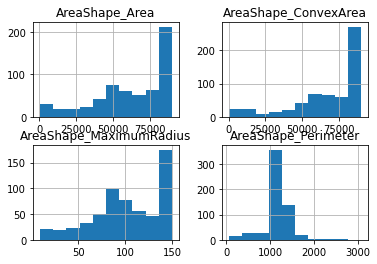

In [7]:
#pd.DataFrame.hist(patch_max,column=good_cols)
pd.DataFrame.hist(good_df)

In [8]:
DECILES=[x/10 for x in range(1,10,1)]
DECILES=[x/100 for x in range(1,15,1)]

good_df.describe(percentiles=DECILES)

,AreaShape_Area,AreaShape_ConvexArea,AreaShape_MaximumRadius,AreaShape_Perimeter
count,599.000000,599.000000,599.000000,599.000000
mean,63005.482471,68491.929883,103.778596,1188.996047
std,25757.656341,24608.358530,38.316556,315.890611
min,360.000000,373.000000,9.000000,69.112698
1%,1430.880000,1526.540000,13.992029,157.997196
2%,1996.240000,2571.440000,17.718916,269.644655
3%,5627.400000,7073.120000,22.339039,394.147185
4%,7098.960000,9807.600000,25.382145,472.801290
5%,9280.100000,11945.200000,29.952965,580.578420
6%,11905.080000,13886.960000,34.269170,615.360043


## Analysis
CellProfiler designated tissue in 599 out of 600 patches.
In all four measures plotted, the mode accounts for the majority of the patches.

There is no elbow to indicate a clear choice of threshold.
Suppose about 10% of patches are majority background, a reasonable guess after visual inspection.
Then I recommend we exclude 10% of patches by requiring Area>20K or ConvexArea>25K.